In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spateo as st
import dynamo as dyn

2025-05-02 23:19:58.953542: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-02 23:19:58.973325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746199198.997269  241673 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746199199.004648  241673 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-02 23:19:59.029875: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.


/home/liangzhen/anaconda3/envs/spateo/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/liangzhen/anaconda3/envs/spateo/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/liangzhen/anaconda3/envs/spateo/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same

In [2]:
st.__version__

'0.0.0'

In [3]:
adata = st.read_h5ad('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/B03203C612.tissue.bin50.h5ad')
adata.obsm['spatial'] = np.array(adata.obs[['x', 'y']])
adata.obs['x_y'] = adata.obs['x'].astype('str') +'_'+ adata.obs['y'].astype('str') 
metadata = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/spacia_metadata.txt',index_col=0)
metadata = metadata.loc[metadata['spot_class'] != 'reject',]
metadata.index = metadata['x'].astype('str') +'_'+ metadata['y'].astype('str') 
adata_selected = adata[adata.obs['x_y'].isin(metadata.index),]
adata_selected.obs['celltype'] = metadata.loc[adata_selected.obs['x_y'],'first_type'].to_list()

/tmp/ipykernel_241673/1994576803.py:8: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [4]:
adata_selected.obs['celltype'].value_counts()

celltype
3              13164
2              10526
Fibroblast      3463
Macrophage      1980
5               1444
1               1412
Monocyte         470
4                366
DC               357
endothelial      210
T_cell            10
NK                 4
Neutrophil         4
Name: count, dtype: int64

In [5]:
adata_selected = adata_selected[adata_selected.obs['celltype'].isin(['1','2','3']),]

In [6]:
adata_selected.obs

,orig.ident,x,y,x_y,celltype
7086696041850,sample,1650,3450,1650_3450,2
7086696042750,sample,1650,4350,1650_4350,2
7086696042850,sample,1650,4450,1650_4450,3
7086696043000,sample,1650,4600,1650_4600,2
7086696047000,sample,1650,8600,1650_8600,3
...,...,...,...,...,...
49821620644550,sample,11600,10950,11600_10950,1
49821620644600,sample,11600,11000,11600_11000,2
49821620644700,sample,11600,11100,11600_11100,1
49821620644800,sample,11600,11200,11600_11200,2


In [7]:
adata_selected

View of AnnData object with n_obs × n_vars = 25102 × 25254
    obs: 'orig.ident', 'x', 'y', 'x_y', 'celltype'
    uns: 'sn'
    obsm: 'spatial'

In [8]:
adata_selected.uns['pp'] = {}
adata_selected.uns['__type'] = 'UMI'
adata_selected.uns['color_key'] = {
    '1':'#a6cee3',
    '2':'#54278f',
    '3':'#e7298a',
    '4':'#1f77b4',
    '5':'#ff6600',
    'Fibroblast':'green',
    'endothelial':'#bf5b17',
    'Monocyte':'#beaed4',
    'DC':'#386cb0',
    'Macrophage':'yellow',
    'Neutrophil':'#fdc086',
    'Mast_cell':'#f0027f',
    'NK':'#e6550d',
    'T_cell':'#c51b8a'
}


/home/liangzhen/anaconda3/envs/spateo/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning:

Trying to modify attribute `._uns` of view, initializing view as actual.



In [9]:
# Preprocessing
st.pp.filter.filter_genes(adata_selected, min_cells=3, inplace=True)

# Normalization
dyn.pp.normalize_cell_expr_by_size_factors(adata_selected, layers="X")

# Linear reduction
st.tl.pca_spateo(adata_selected, n_pca_components=30)

# Identify neighbors(KNN)
dyn.tl.neighbors(adata_selected, n_neighbors=30)

/tmp/ipykernel_241673/671370406.py:5: DeprecationWarning:

normalize_cell_expr_by_size_factors is deprecated and will be removed in a future release. Please update your code to use the new replacement function.



|-----> Set <adata.X> to normalized data
|-----> Running PCA on adata.X...
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method pynn selected


AnnData object with n_obs × n_vars = 25102 × 21584
    obs: 'orig.ident', 'x', 'y', 'x_y', 'celltype', 'Size_Factor', 'initial_cell_size'
    var: 'pass_basic_filter'
    uns: 'sn', 'pp', '__type', 'color_key', 'neighbors'
    obsm: 'spatial', 'X_pca'
    obsp: 'distances', 'connectivities'

In [10]:
adata_selected

AnnData object with n_obs × n_vars = 25102 × 21584
    obs: 'orig.ident', 'x', 'y', 'x_y', 'celltype', 'Size_Factor', 'initial_cell_size'
    var: 'pass_basic_filter'
    uns: 'sn', 'pp', '__type', 'color_key', 'neighbors'
    obsm: 'spatial', 'X_pca'
    obsp: 'distances', 'connectivities'

In [12]:
_, adata_selected = st.tl.neighbors(
    adata_selected,
    basis='spatial',
    spatial_key='spatial',
    n_neighbors=10
)

|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.


# cluster

In [13]:
adata_selected

AnnData object with n_obs × n_vars = 32355 × 22191
    obs: 'orig.ident', 'x', 'y', 'x_y', 'celltype', 'Size_Factor', 'initial_cell_size'
    var: 'pass_basic_filter'
    uns: 'sn', 'pp', '__type', 'color_key', 'neighbors', 'celltype_colors', 'spatial_neighbors'
    obsm: 'spatial', 'X_pca', 'X_spatial'
    obsp: 'distances', 'connectivities', 'spatial_distances', 'spatial_connectivities'

In [15]:
adata_selected

AnnData object with n_obs × n_vars = 32355 × 22191
    obs: 'orig.ident', 'x', 'y', 'x_y', 'celltype', 'Size_Factor', 'initial_cell_size'
    var: 'pass_basic_filter'
    uns: 'sn', 'pp', '__type', 'color_key', 'neighbors', 'celltype_colors', 'spatial_neighbors'
    obsm: 'spatial', 'X_pca', 'X_spatial'
    obsp: 'distances', 'connectivities', 'spatial_distances', 'spatial_connectivities'

In [13]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
colors = [
    (0.0, "white"),     
    (1.0, "#de2d26")   
]

cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'N', 'T', 'a', 'b', 'c', 'd', 'e', 'five', 'g', 'h', 'i', 'l', 'm', 'nonmarkingreturn', 'o', 'one', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 24, 49, 55, 68, 69, 70, 71, 72, 74, 75, 76, 79, 80, 82, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'N', 'T', 'a', 'b', 'c', 'd', 'e', 'five', 'g', 'h', 'i', 'l', 'm', 'non

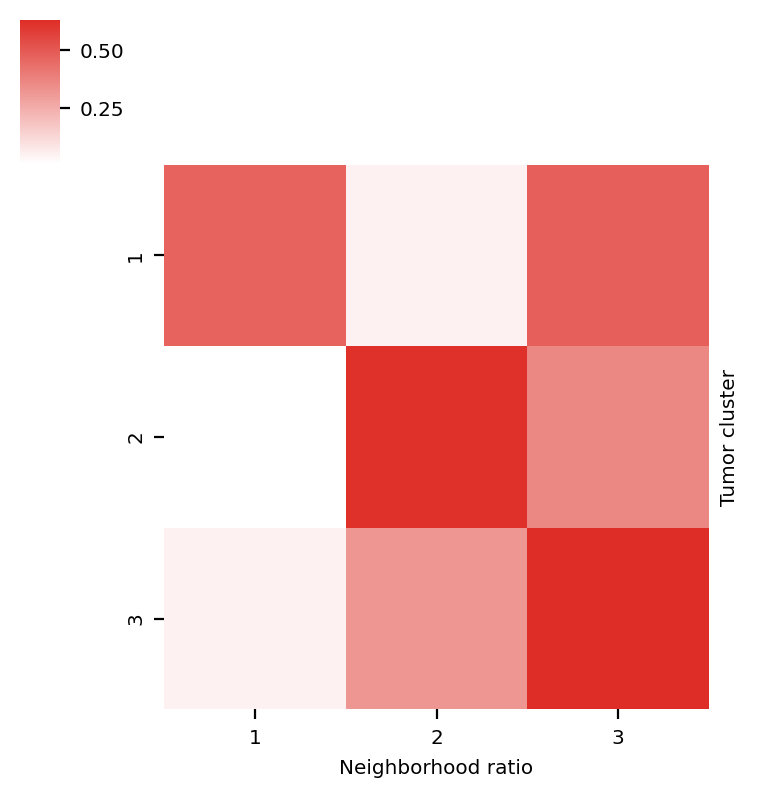

In [15]:
adata_selected_state = adata_selected[adata_selected.obs['celltype'].isin(['1','2','3']),]
_, adata_selected_state = st.tl.neighbors(
    adata_selected_state,
    basis='spatial',
    spatial_key='spatial',
    n_neighbors=10
)


cluster_neighbors_all = pd.DataFrame()
for celltype in set(adata_selected_state.obs.celltype):
    neighbors = adata_selected_state.obs.iloc[list(set(adata_selected_state.uns['spatial_neighbors']['indices'][adata_selected_state.obs.celltype==celltype].flatten())),4]  
    cluster_neighbors = pd.DataFrame(neighbors.value_counts())
    cluster_neighbors['tumor_state'] = celltype
    cluster_neighbors['neighbors'] = cluster_neighbors.index
    cluster_neighbors_all = pd.concat([cluster_neighbors_all,cluster_neighbors],axis=0)    
    
cluster_neighbors_all = cluster_neighbors_all.pivot(index='tumor_state', columns='neighbors', values='count')
cluster_neighbors_all = cluster_neighbors_all.fillna(0)
cluster_neighbors_all = cluster_neighbors_all.iloc[0:3,0:3]
row_sums = cluster_neighbors_all.sum(axis=1)
cluster_neighbors_all = cluster_neighbors_all.div(row_sums, axis=0)
clustermap = sns.clustermap(cluster_neighbors_all.round(2),figsize=[4,4],col_cluster=False,row_cluster=False,annot=False,cmap=cmap)
clustermap.ax_heatmap.yaxis.set_ticks_position('left')
clustermap.ax_heatmap.set_xlabel("Neighborhood ratio")
clustermap.ax_heatmap.set_ylabel("Tumor cluster")
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure5/Figure1a/T2_state_neighborhood.pdf')
plt.show()

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 31 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'F', 'M', 'N', 'T', 'a', 'b', 'c', 'd', 'e', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 41, 48, 49, 55, 68, 69, 70, 71, 72, 74, 75, 76, 79, 80, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 31 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'F', 'M', 'N', 'T', 'a', 'b', 'c'

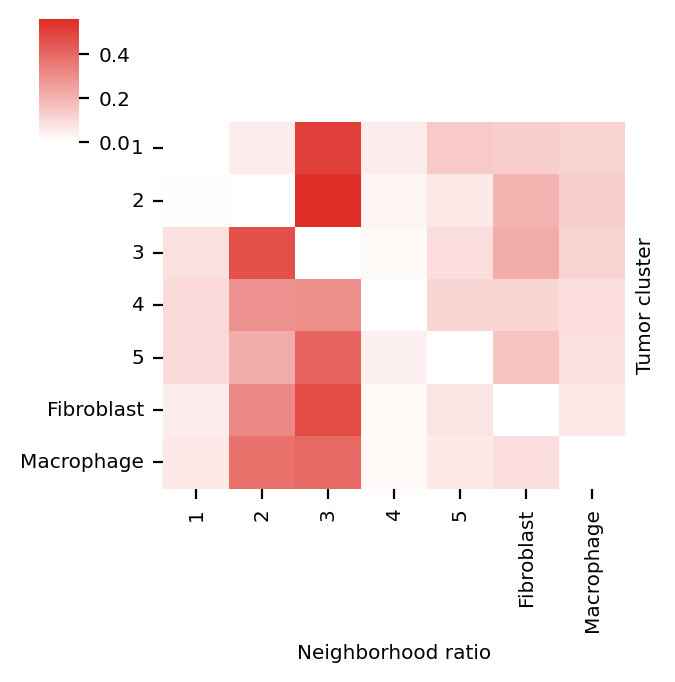

In [27]:
cluster_neighbors_all = pd.DataFrame()
for celltype in set(adata_selected.obs.celltype):
    neighbors = adata_selected.obs.iloc[list(set(adata_selected.uns['spatial_neighbors']['indices'][adata_selected.obs.celltype==celltype].flatten())),4]  
    cluster_neighbors = pd.DataFrame(neighbors.value_counts())
    cluster_neighbors['tumor_state'] = celltype
    cluster_neighbors['neighbors'] = cluster_neighbors.index
    cluster_neighbors = cluster_neighbors[cluster_neighbors['neighbors']!=celltype]
    cluster_neighbors_all = pd.concat([cluster_neighbors_all,cluster_neighbors],axis=0)    
    
cluster_neighbors_all = cluster_neighbors_all.pivot(index='tumor_state', columns='neighbors', values='count')
cluster_neighbors_all = cluster_neighbors_all.fillna(0)
cluster_neighbors_all = cluster_neighbors_all.iloc[0:7,:]
row_sums = cluster_neighbors_all.sum(axis=1)
cluster_neighbors_all = cluster_neighbors_all.div(row_sums, axis=0)
clustermap = sns.clustermap(cluster_neighbors_all.round(2),figsize=[4,3.4],col_cluster=False,row_cluster=False,annot=False,cmap=cmap)
clustermap.ax_heatmap.yaxis.set_ticks_position('left')
clustermap.ax_heatmap.set_xlabel("Neighborhood ratio")
clustermap.ax_heatmap.set_ylabel("Tumor cluster")
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure5/Figure1a/T2_remove_selfstate_neighborhood.pdf')
plt.show()

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 30 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'F', 'M', 'a', 'b', 'c', 'e', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 41, 48, 66, 68, 69, 70, 72, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 30 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'F', 'M', 'a', 'b', 'c', 'e', 'fi

<Figure size 400x400 with 0 Axes>

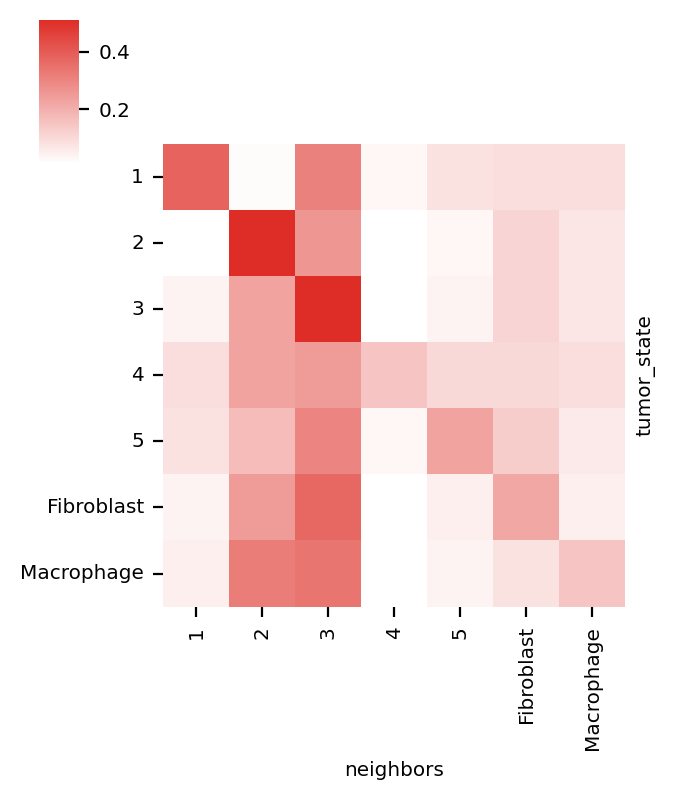

In [16]:
cluster_neighbors_all = pd.DataFrame()
for celltype in set(adata_selected.obs.celltype):
    neighbors = adata_selected.obs.iloc[list(set(adata_selected.uns['spatial_neighbors']['indices'][adata_selected.obs.celltype==celltype].flatten())),4]  
    cluster_neighbors = pd.DataFrame(neighbors.value_counts())
    cluster_neighbors['tumor_state'] = celltype
    cluster_neighbors['neighbors'] = cluster_neighbors.index
    cluster_neighbors_all = pd.concat([cluster_neighbors_all,cluster_neighbors],axis=0)    
    
cluster_neighbors_all = cluster_neighbors_all.pivot(index='tumor_state', columns='neighbors', values='count')
cluster_neighbors_all = cluster_neighbors_all.fillna(0)
cluster_neighbors_all = cluster_neighbors_all.iloc[:,:]
row_sums = cluster_neighbors_all.sum(axis=1)
cluster_neighbors_all = cluster_neighbors_all.div(row_sums, axis=0)
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(4, 4)
clustermap = sns.clustermap(cluster_neighbors_all.round(2),figsize=[4,4],col_cluster=False,row_cluster=False,annot=False,cmap=cmap)
clustermap.ax_heatmap.yaxis.set_ticks_position('left')
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure5/T2_state_neighborhood.pdf')
plt.show()